# Aula 11 LIA
## Aluno: Danilo Moreira Cordeiro

## Análise do Dataset Car Evaluation

## Introdução à Ciência de Dados

**Dataset:** Car Evaluation Database

**Fonte:** UCI Machine Learning Repository

**Objetivo:** Classificar carros em categorias de aceitabilidade (unacc, acc, good, vgood)

### Estrutura do Projeto:
1. Importação das bibliotecas
2. Carregamento do dataset
3. Exploração inicial (EDA)
4. Preparação dos dados
5. Modelagem
6. Predições e Avaliação
7. Conclusões

## 1. Importação das Bibliotecas

In [1]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from io import StringIO

# Scikit-learn para machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Configurações para visualização
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

# Configurações do pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


## 2. Carregamento do Dataset

In [2]:
# Nomes das colunas conforme documentação da UCI
column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

# Carregar dataset diretamente da UCI (formato .data)
print("Baixando o dataset Car Evaluation da UCI...")
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
df = pd.read_csv(data_url, names=column_names)

print(f"Dataset carregado com sucesso!")
print(f"Formato do dataset: {df.shape}")
print("\nPrimeiras 5 linhas:")
df.head()

Baixando o dataset Car Evaluation da UCI...
Dataset carregado com sucesso!
Formato do dataset: (1728, 7)

Primeiras 5 linhas:


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


## 3. Exploração Inicial dos Dados (EDA)

### 3.1 Informações Gerais do Dataset

In [3]:
# Tamanho do dataset
print(f"Tamanho do dataset: {df.shape[0]} instâncias e {df.shape[1]} atributos")
print(f"\nTotal de registros: {len(df)}")

# Informações sobre o dataset
print("\n=== INFORMAÇÕES DO DATASET ===")
df.info()

# Verificar valores únicos em cada coluna
print("\n=== VALORES ÚNICOS POR ATRIBUTO ===")
for col in df.columns:
    unique_values = df[col].unique()
    print(f"{col}: {unique_values} ({len(unique_values)} valores únicos)")

# Verificar valores ausentes
print("\n=== VALORES AUSENTES ===")
missing_values = df.isnull().sum()
if missing_values.sum() == 0:
    print("✅ Não há valores ausentes no dataset!")
else:
    print(missing_values)

Tamanho do dataset: 1728 instâncias e 7 atributos

Total de registros: 1728

=== INFORMAÇÕES DO DATASET ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB

=== VALORES ÚNICOS POR ATRIBUTO ===
buying: ['vhigh' 'high' 'med' 'low'] (4 valores únicos)
maint: ['vhigh' 'high' 'med' 'low'] (4 valores únicos)
doors: ['2' '3' '4' '5more'] (4 valores únicos)
persons: ['2' '4' 'more'] (3 valores únicos)
lug_boot: ['small' 'med' 'big'] (3 valores únicos)
safety: ['low' 'med' 'high'] (3 valores únicos)
class: ['unacc' 'acc' 'vgood' 'good'] (4 valores únicos)

=== V

### 3.2 Distribuição das Classes de Avaliação

=== DISTRIBUIÇÃO DAS CLASSES ===
       Frequência  Percentual
class                        
unacc        1210   70.023148
acc           384   22.222222
good           69    3.993056
vgood          65    3.761574


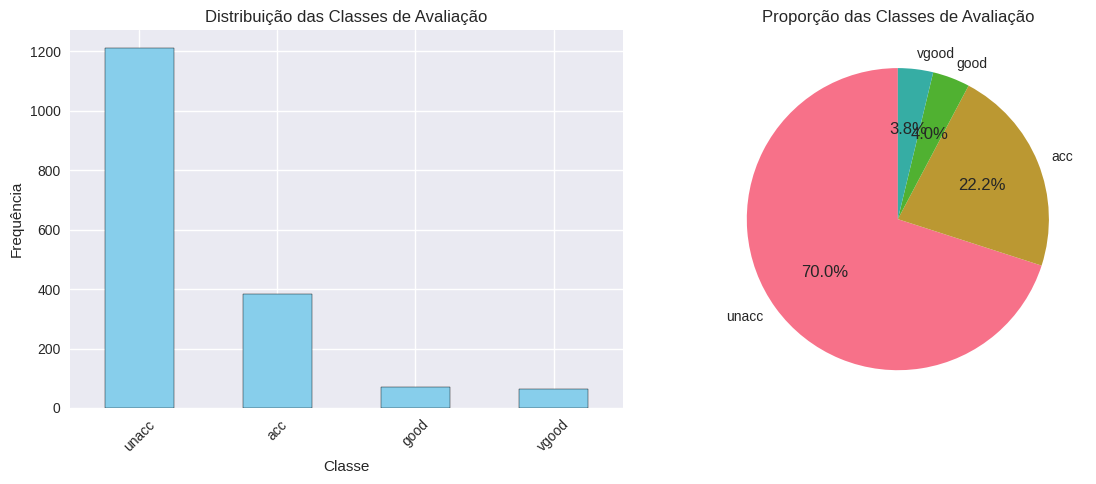

In [4]:
# Frequência das classes de avaliação
print("=== DISTRIBUIÇÃO DAS CLASSES ===")
class_counts = df['class'].value_counts()
class_percentages = df['class'].value_counts(normalize=True) * 100

class_summary = pd.DataFrame({
    'Frequência': class_counts,
    'Percentual': class_percentages
})

print(class_summary)

# Visualização da distribuição das classes
plt.figure(figsize=(12, 5))

# Gráfico de barras
plt.subplot(1, 2, 1)
class_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribuição das Classes de Avaliação')
plt.xlabel('Classe')
plt.ylabel('Frequência')
plt.xticks(rotation=45)

# Gráfico de pizza
plt.subplot(1, 2, 2)
plt.pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proporção das Classes de Avaliação')

plt.tight_layout()
plt.show()

### 3.3 Visualizações dos Atributos Categóricos

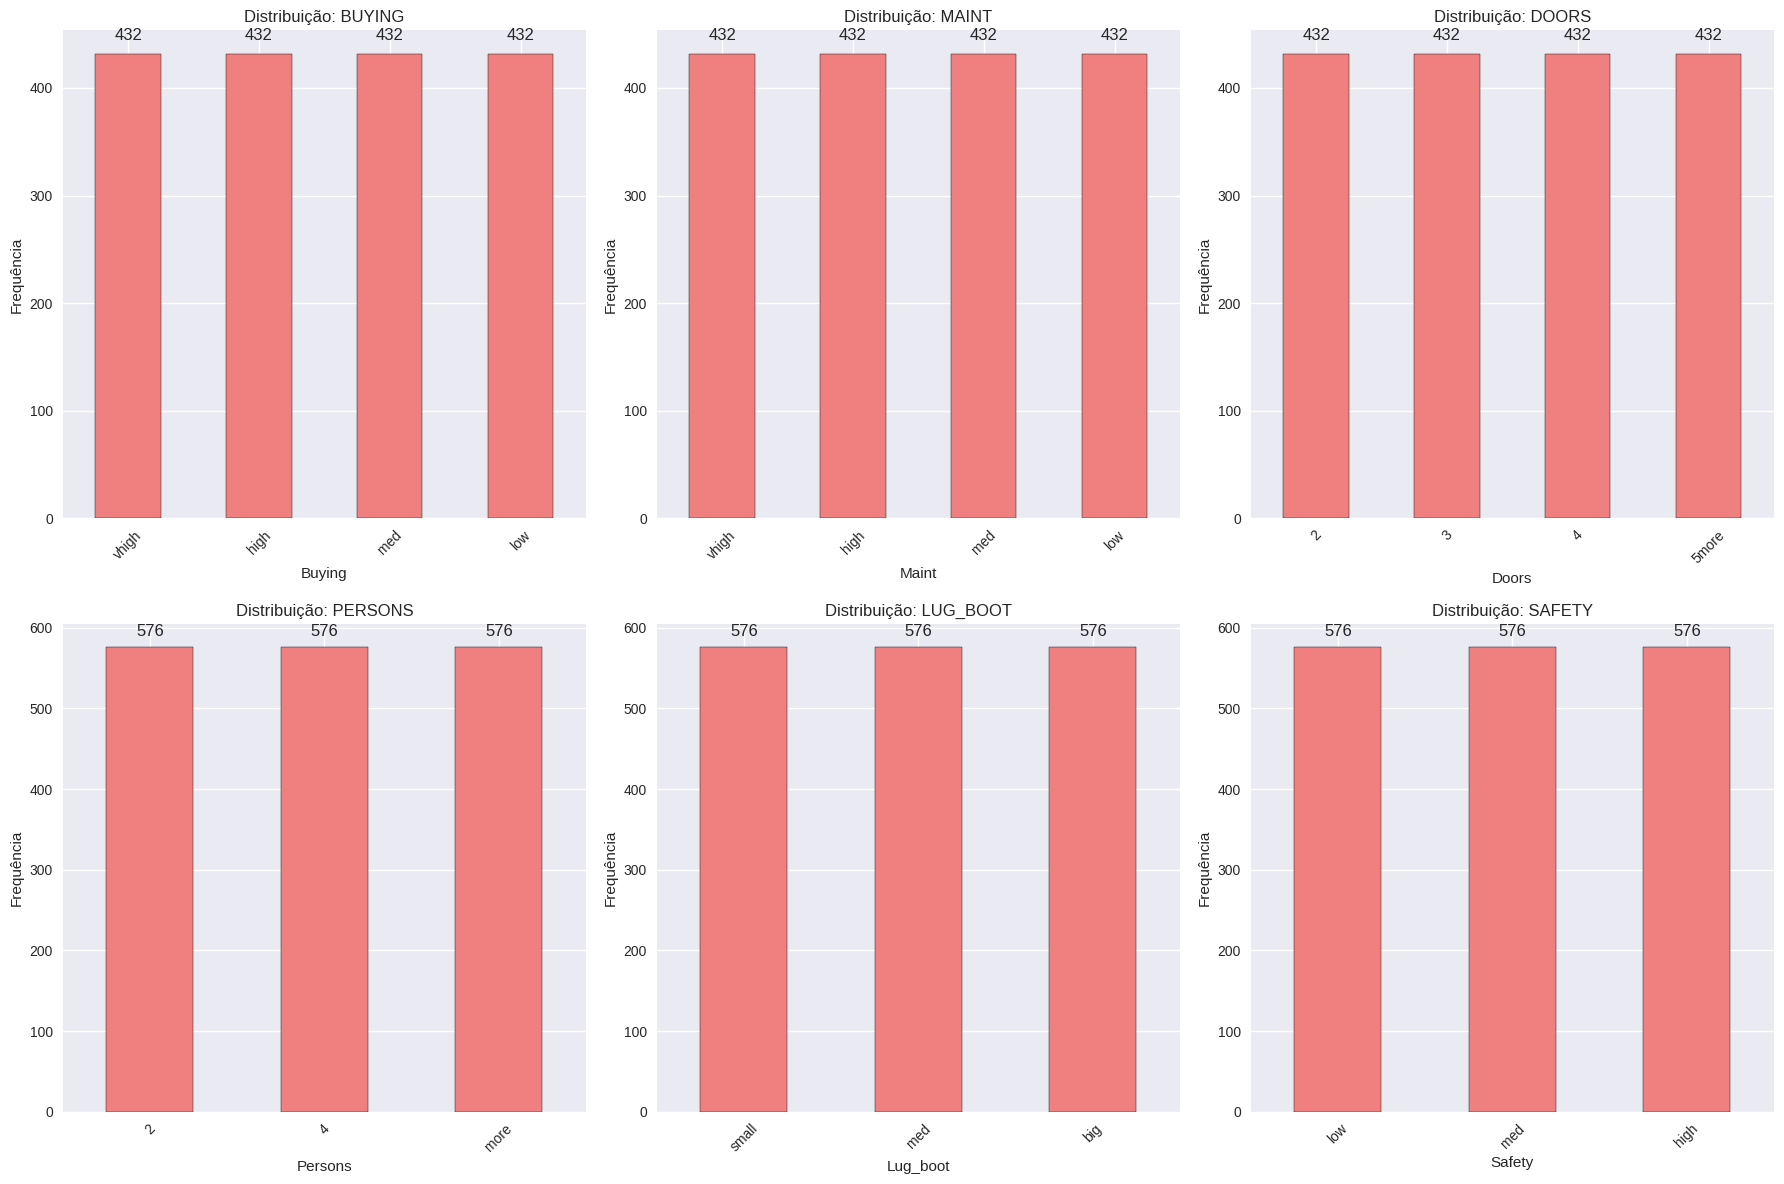

In [5]:
# Criar visualizações para cada atributo categórico
features = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

plt.figure(figsize=(18, 12))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)

    # Contar frequências
    counts = df[feature].value_counts()

    # Gráfico de barras
    counts.plot(kind='bar', color='lightcoral', edgecolor='black')
    plt.title(f'Distribuição: {feature.upper()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Frequência')
    plt.xticks(rotation=45)

    # Adicionar valores nas barras
    for j, v in enumerate(counts.values):
        plt.text(j, v + 10, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

### 3.4 Análise da Relação entre Atributos e Classes

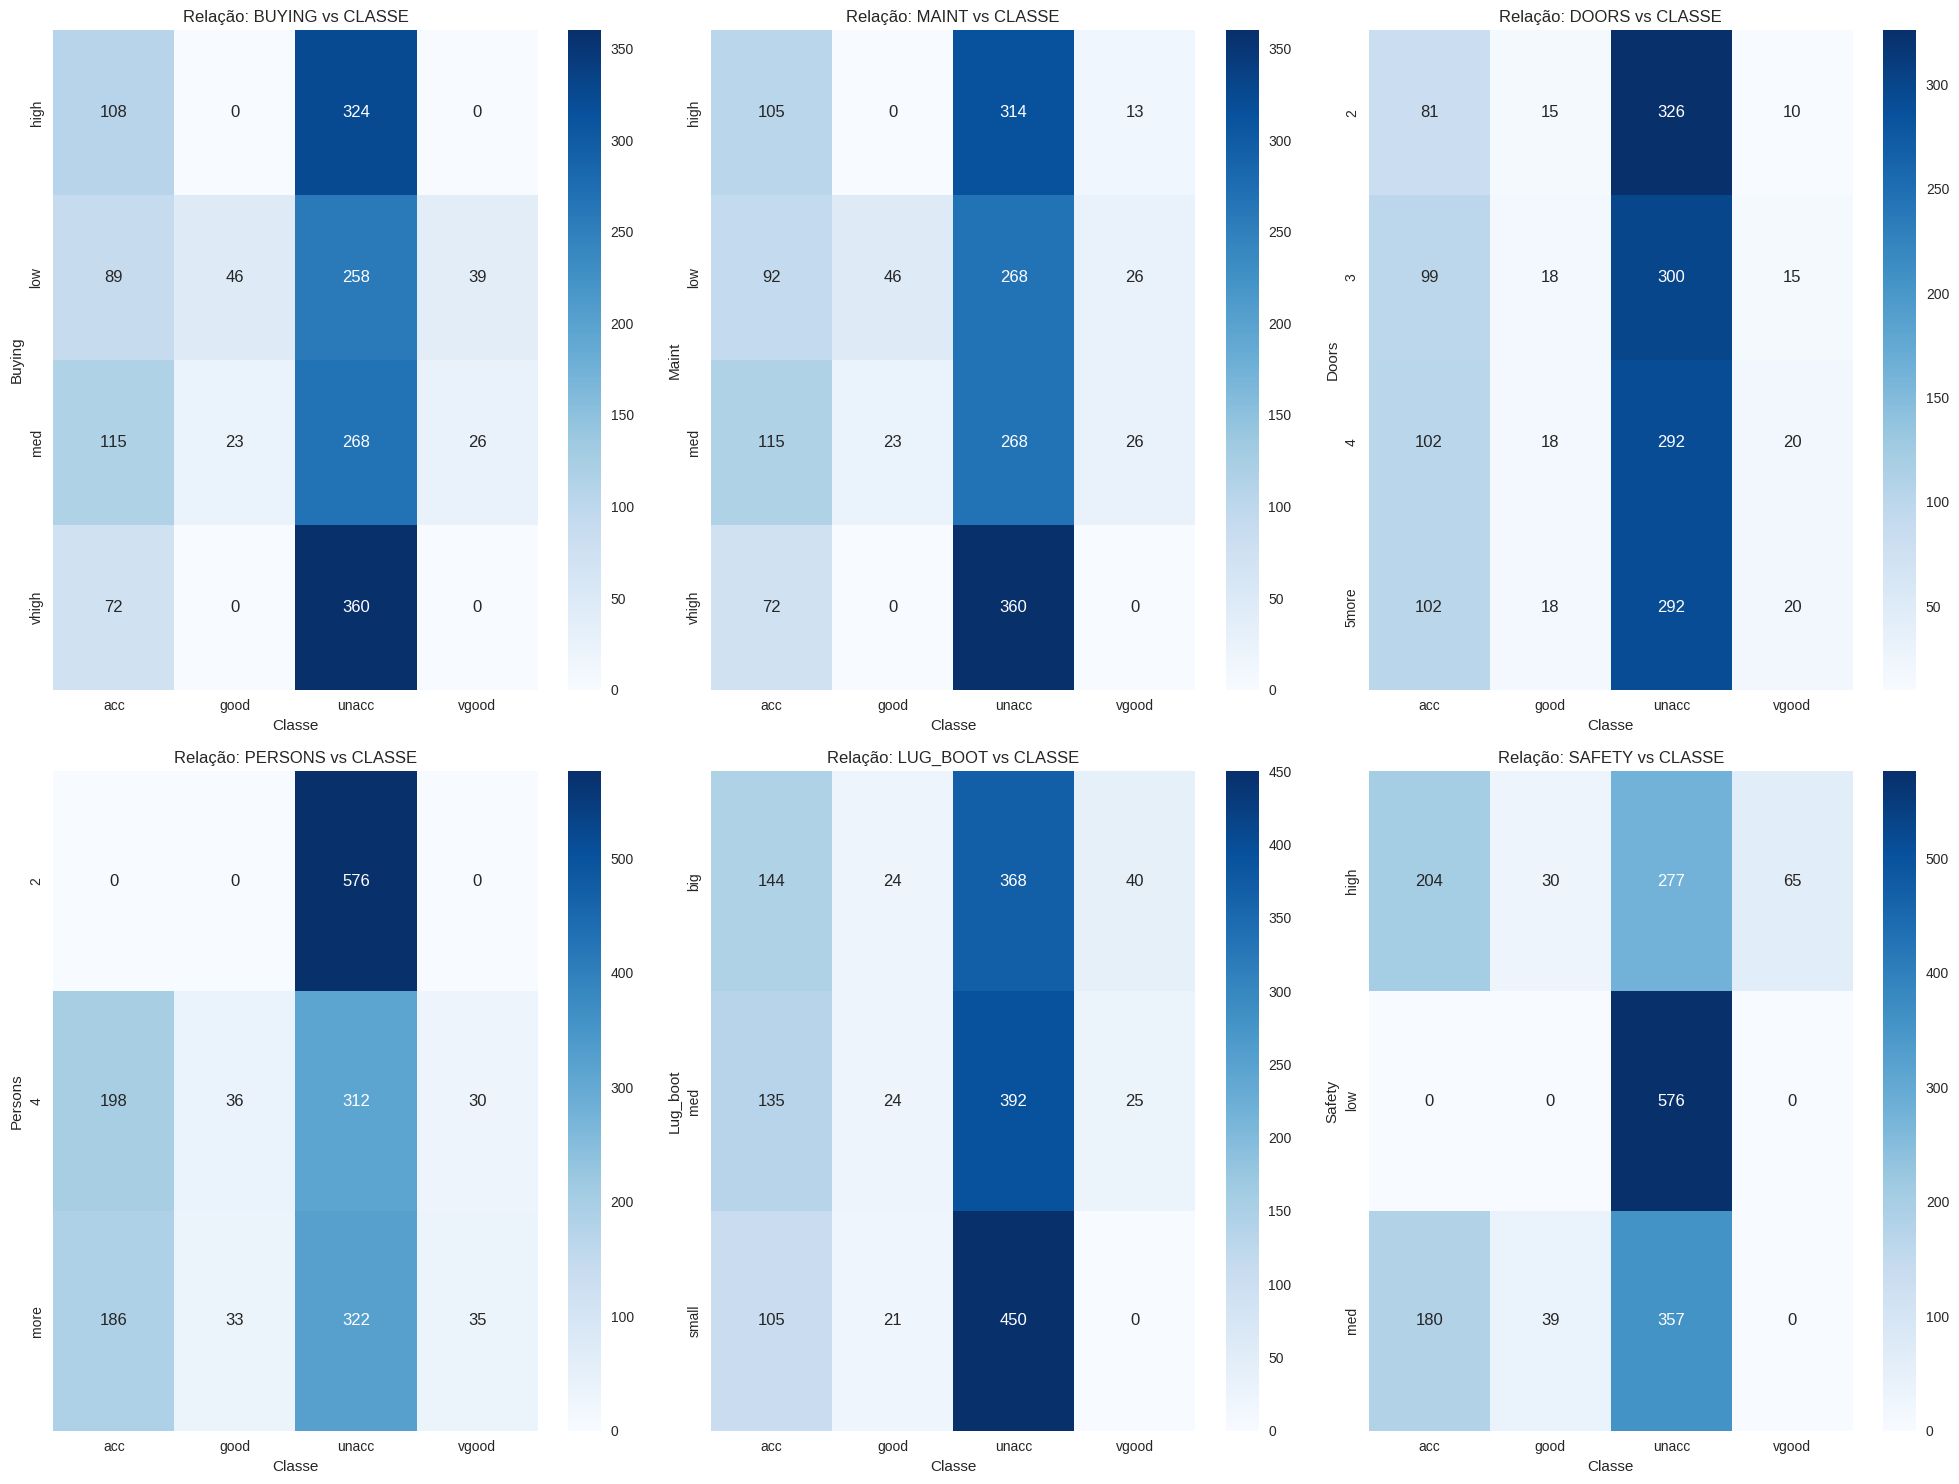

In [6]:
# Criar heatmap de contagem cruzada para cada atributo vs classe
plt.figure(figsize=(20, 15))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)

    # Tabela de contingência
    crosstab = pd.crosstab(df[feature], df['class'])

    # Heatmap
    sns.heatmap(crosstab, annot=True, fmt='d', cmap='Blues', cbar=True)
    plt.title(f'Relação: {feature.upper()} vs CLASSE')
    plt.xlabel('Classe')
    plt.ylabel(feature.capitalize())

plt.tight_layout()
plt.show()

## 4. Preparação dos Dados

### 4.1 Transformação de Variáveis Categóricas

In [7]:
print("=== TRANSFORMAÇÃO DE VARIÁVEIS CATEGÓRICAS ===")
print("Métodos que serão testados:")
print("1. Label Encoding para todas as variáveis")
print("2. One-Hot Encoding usando pandas get_dummies")

# Método 1: Label Encoding
print("\n--- Método 1: Label Encoding ---")
df_label = df.copy()

# Aplicar Label Encoding para todas as colunas categóricas
label_encoders = {}
for col in df_label.columns:
    le = LabelEncoder()
    df_label[col] = le.fit_transform(df_label[col])
    label_encoders[col] = le
    print(f"{col}: {le.classes_}")

print("\nDataset com Label Encoding:")
print(df_label.head())

=== TRANSFORMAÇÃO DE VARIÁVEIS CATEGÓRICAS ===
Métodos que serão testados:
1. Label Encoding para todas as variáveis
2. One-Hot Encoding usando pandas get_dummies

--- Método 1: Label Encoding ---
buying: ['high' 'low' 'med' 'vhigh']
maint: ['high' 'low' 'med' 'vhigh']
doors: ['2' '3' '4' '5more']
persons: ['2' '4' 'more']
lug_boot: ['big' 'med' 'small']
safety: ['high' 'low' 'med']
class: ['acc' 'good' 'unacc' 'vgood']

Dataset com Label Encoding:
   buying  maint  doors  persons  lug_boot  safety  class
0       3      3      0        0         2       1      2
1       3      3      0        0         2       2      2
2       3      3      0        0         2       0      2
3       3      3      0        0         1       1      2
4       3      3      0        0         1       2      2


In [8]:
# Método 2: One-Hot Encoding
print("--- Método 2: One-Hot Encoding ---")

# Separar features e target
X_original = df.drop('class', axis=1)
y = df['class']

# Aplicar One-Hot Encoding usando pandas get_dummies
X_onehot = pd.get_dummies(X_original, prefix=X_original.columns)
print(f"Dimensões após One-Hot Encoding: {X_onehot.shape}")
print(f"Colunas criadas: {list(X_onehot.columns)}")

# Encoding do target (usar encoder único para consistência)
target_encoder = LabelEncoder()
y_encoded = target_encoder.fit_transform(y)
target_classes = target_encoder.classes_
print(f"\nClasses do target: {target_classes}")

--- Método 2: One-Hot Encoding ---
Dimensões após One-Hot Encoding: (1728, 21)
Colunas criadas: ['buying_high', 'buying_low', 'buying_med', 'buying_vhigh', 'maint_high', 'maint_low', 'maint_med', 'maint_vhigh', 'doors_2', 'doors_3', 'doors_4', 'doors_5more', 'persons_2', 'persons_4', 'persons_more', 'lug_boot_big', 'lug_boot_med', 'lug_boot_small', 'safety_high', 'safety_low', 'safety_med']

Classes do target: ['acc' 'good' 'unacc' 'vgood']


### 4.2 Divisão em Treino e Teste

In [9]:
# Preparar dados para ambos os métodos de encoding
print("=== DIVISÃO EM TREINO E TESTE ===")

# Para Label Encoding
X_label = df_label.drop('class', axis=1)
y_label = df_label['class']

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(
    X_label, y_label, test_size=0.2, random_state=42, stratify=y_label
)

# Para One-Hot Encoding
X_train_onehot, X_test_onehot, y_train_onehot, y_test_onehot = train_test_split(
    X_onehot, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"Treino (Label Encoding): {X_train_label.shape[0]} amostras")
print(f"Teste (Label Encoding): {X_test_label.shape[0]} amostras")
print(f"Treino (One-Hot): {X_train_onehot.shape[0]} amostras, {X_train_onehot.shape[1]} features")
print(f"Teste (One-Hot): {X_test_onehot.shape[0]} amostras, {X_test_onehot.shape[1]} features")

# Verificar distribuição das classes nos conjuntos
print("\nDistribuição das classes no conjunto de treino:")
print(pd.Series(y_train_label).value_counts().sort_index())

=== DIVISÃO EM TREINO E TESTE ===
Treino (Label Encoding): 1382 amostras
Teste (Label Encoding): 346 amostras
Treino (One-Hot): 1382 amostras, 21 features
Teste (One-Hot): 346 amostras, 21 features

Distribuição das classes no conjunto de treino:
class
0    307
1     55
2    968
3     52
Name: count, dtype: int64


## 5. Modelagem

### 5.1 Treinamento dos Modelos

In [10]:
# Definir modelos para teste
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

# Nota sobre KNN: Não é ideal para features label-encoded, mas incluído para comparação
print("Nota: KNN com Label Encoding pode não ser ideal para features categóricas.")
print("One-Hot Encoding é mais apropriado para algoritmos baseados em distância.\n")

# Dicionários para armazenar resultados
results_label = {}
results_onehot = {}
trained_models_label = {}
trained_models_onehot = {}

print("=== TREINAMENTO DOS MODELOS ===")
print("\n--- Com Label Encoding ---")

# Treinar modelos com Label Encoding
for name, model in models.items():
    print(f"Treinando {name}...")

    # Treinar modelo
    model.fit(X_train_label, y_train_label)

    # Predições
    y_pred = model.predict(X_test_label)

    # Calcular acurácia
    accuracy = accuracy_score(y_test_label, y_pred)

    # Armazenar resultados
    results_label[name] = {
        'accuracy': accuracy,
        'predictions': y_pred
    }
    trained_models_label[name] = model

    print(f"  Acurácia: {accuracy:.4f}")

print("\n--- Com One-Hot Encoding ---")

# Treinar modelos com One-Hot Encoding
for name, model_class in models.items():
    print(f"Treinando {name}...")

    # Criar nova instância do modelo
    if name == 'Decision Tree':
        model = DecisionTreeClassifier(random_state=42)
    elif name == 'Random Forest':
        model = RandomForestClassifier(n_estimators=100, random_state=42)
    else:  # KNN
        model = KNeighborsClassifier(n_neighbors=5)

    # Treinar modelo
    model.fit(X_train_onehot, y_train_onehot)

    # Predições
    y_pred = model.predict(X_test_onehot)

    # Calcular acurácia
    accuracy = accuracy_score(y_test_onehot, y_pred)

    # Armazenar resultados
    results_onehot[name] = {
        'accuracy': accuracy,
        'predictions': y_pred
    }
    trained_models_onehot[name] = model

    print(f"  Acurácia: {accuracy:.4f}")

Nota: KNN com Label Encoding pode não ser ideal para features categóricas.
One-Hot Encoding é mais apropriado para algoritmos baseados em distância.

=== TREINAMENTO DOS MODELOS ===

--- Com Label Encoding ---
Treinando Decision Tree...
  Acurácia: 0.9855
Treinando Random Forest...
  Acurácia: 0.9827
Treinando KNN...
  Acurácia: 0.9104

--- Com One-Hot Encoding ---
Treinando Decision Tree...
  Acurácia: 0.9740
Treinando Random Forest...
  Acurácia: 0.9682
Treinando KNN...
  Acurácia: 0.8931


### 5.2 Comparação de Acurácia dos Modelos

=== COMPARAÇÃO DE ACURÁCIA DOS MODELOS ===
       Modelo  Label Encoding  One-Hot Encoding
Decision Tree        0.985549          0.973988
Random Forest        0.982659          0.968208
          KNN        0.910405          0.893064


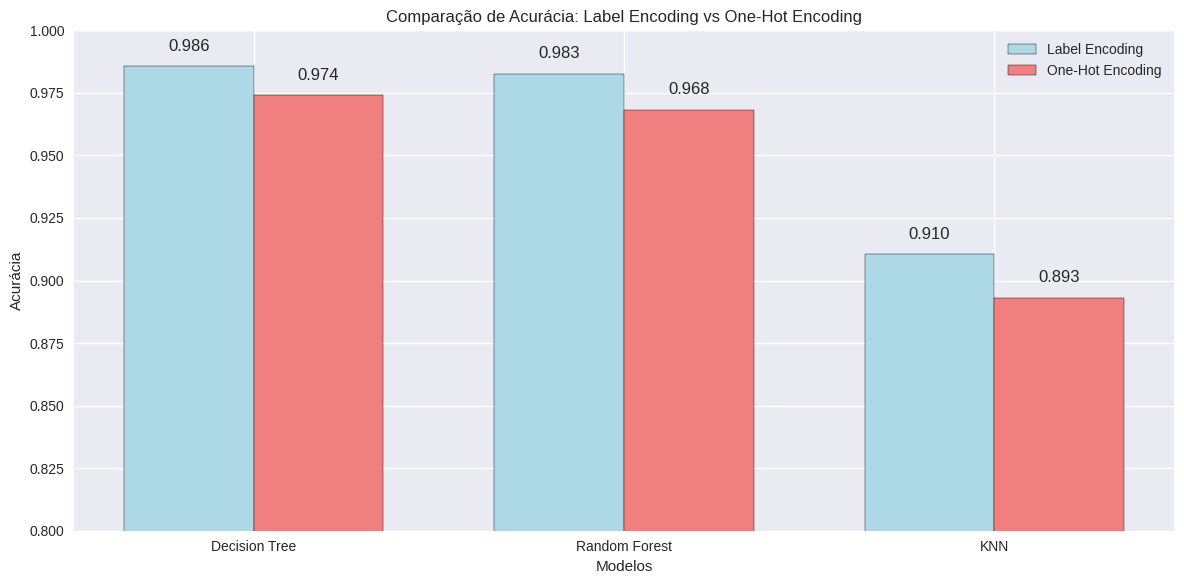


🏆 Melhor modelo (Label Encoding): Decision Tree - 0.9855
🏆 Melhor modelo (One-Hot Encoding): Decision Tree - 0.9740


In [11]:
# Criar DataFrame com comparação de resultados
comparison_data = []
for name in models.keys():
    comparison_data.append({
        'Modelo': name,
        'Label Encoding': results_label[name]['accuracy'],
        'One-Hot Encoding': results_onehot[name]['accuracy']
    })

comparison_df = pd.DataFrame(comparison_data)
print("=== COMPARAÇÃO DE ACURÁCIA DOS MODELOS ===")
print(comparison_df.to_string(index=False))

# Visualização da comparação
plt.figure(figsize=(12, 6))

x = np.arange(len(models))
width = 0.35

plt.bar(x - width/2, comparison_df['Label Encoding'], width,
        label='Label Encoding', color='lightblue', edgecolor='black')
plt.bar(x + width/2, comparison_df['One-Hot Encoding'], width,
        label='One-Hot Encoding', color='lightcoral', edgecolor='black')

plt.xlabel('Modelos')
plt.ylabel('Acurácia')
plt.title('Comparação de Acurácia: Label Encoding vs One-Hot Encoding')
plt.xticks(x, comparison_df['Modelo'])
plt.legend()
plt.ylim(0.8, 1.0)

# Adicionar valores nas barras
for i, v in enumerate(comparison_df['Label Encoding']):
    plt.text(i - width/2, v + 0.005, f'{v:.3f}', ha='center', va='bottom')
for i, v in enumerate(comparison_df['One-Hot Encoding']):
    plt.text(i + width/2, v + 0.005, f'{v:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Identificar o melhor modelo
best_label = comparison_df.loc[comparison_df['Label Encoding'].idxmax()]
best_onehot = comparison_df.loc[comparison_df['One-Hot Encoding'].idxmax()]

print(f"\n🏆 Melhor modelo (Label Encoding): {best_label['Modelo']} - {best_label['Label Encoding']:.4f}")
print(f"🏆 Melhor modelo (One-Hot Encoding): {best_onehot['Modelo']} - {best_onehot['One-Hot Encoding']:.4f}")

## 6. Avaliação Detalhada dos Modelos

### 6.1 Matrizes de Confusão

=== MATRIZES DE CONFUSÃO - LABEL ENCODING ===


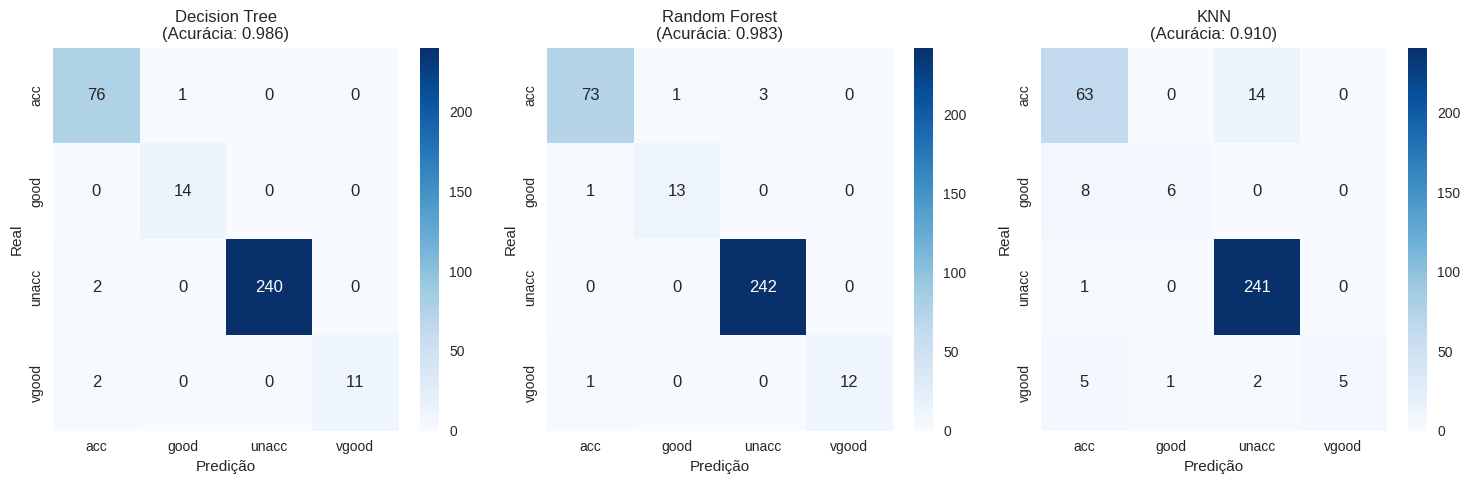

In [12]:
# Matrizes de confusão para Label Encoding
print("=== MATRIZES DE CONFUSÃO - LABEL ENCODING ===")
# Usar as classes do encoder para garantir ordem correta
class_names_label = label_encoders['class'].classes_

plt.figure(figsize=(15, 5))
for i, (name, results) in enumerate(results_label.items(), 1):
    plt.subplot(1, 3, i)
    cm = confusion_matrix(y_test_label, results['predictions'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names_label, yticklabels=class_names_label)
    plt.title(f'{name}\n(Acurácia: {results["accuracy"]:.3f})')
    plt.xlabel('Predição')
    plt.ylabel('Real')

plt.tight_layout()
plt.show()

=== MATRIZES DE CONFUSÃO - ONE-HOT ENCODING ===


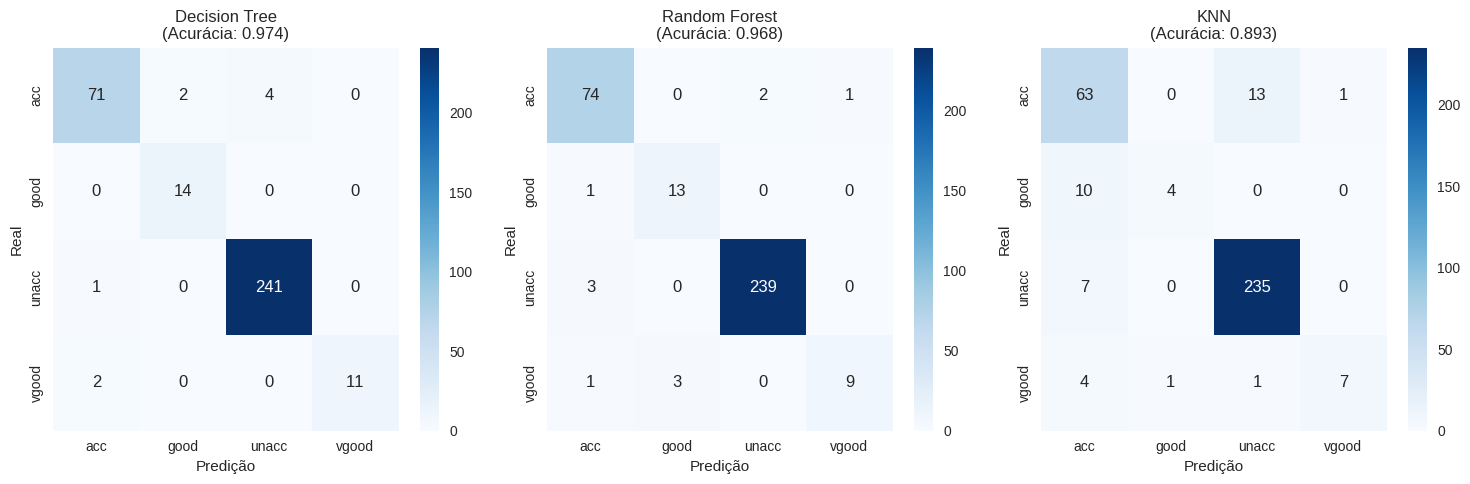

In [13]:
# Matrizes de confusão para One-Hot Encoding
print("=== MATRIZES DE CONFUSÃO - ONE-HOT ENCODING ===")

plt.figure(figsize=(15, 5))
for i, (name, results) in enumerate(results_onehot.items(), 1):
    plt.subplot(1, 3, i)
    cm = confusion_matrix(y_test_onehot, results['predictions'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=target_classes, yticklabels=target_classes)
    plt.title(f'{name}\n(Acurácia: {results["accuracy"]:.3f})')
    plt.xlabel('Predição')
    plt.ylabel('Real')

plt.tight_layout()
plt.show()

### 6.2 Relatórios de Classificação Detalhados

In [14]:
# Relatórios de classificação para o melhor modelo de cada encoding
print("=== RELATÓRIOS DE CLASSIFICAÇÃO DETALHADOS ===")

# Label Encoding - melhor modelo
best_model_label = best_label['Modelo']
print(f"\n--- {best_model_label} (Label Encoding) ---")
print(classification_report(y_test_label, results_label[best_model_label]['predictions'],
                          target_names=class_names_label))

# One-Hot Encoding - melhor modelo
best_model_onehot = best_onehot['Modelo']
print(f"\n--- {best_model_onehot} (One-Hot Encoding) ---")
print(classification_report(y_test_onehot, results_onehot[best_model_onehot]['predictions'],
                          target_names=target_classes))

=== RELATÓRIOS DE CLASSIFICAÇÃO DETALHADOS ===

--- Decision Tree (Label Encoding) ---
              precision    recall  f1-score   support

         acc       0.95      0.99      0.97        77
        good       0.93      1.00      0.97        14
       unacc       1.00      0.99      1.00       242
       vgood       1.00      0.85      0.92        13

    accuracy                           0.99       346
   macro avg       0.97      0.96      0.96       346
weighted avg       0.99      0.99      0.99       346


--- Decision Tree (One-Hot Encoding) ---
              precision    recall  f1-score   support

         acc       0.96      0.92      0.94        77
        good       0.88      1.00      0.93        14
       unacc       0.98      1.00      0.99       242
       vgood       1.00      0.85      0.92        13

    accuracy                           0.97       346
   macro avg       0.95      0.94      0.95       346
weighted avg       0.97      0.97      0.97       346



### 6.3 Análise de Importância das Features

=== ANÁLISE DE IMPORTÂNCIA DAS FEATURES ===


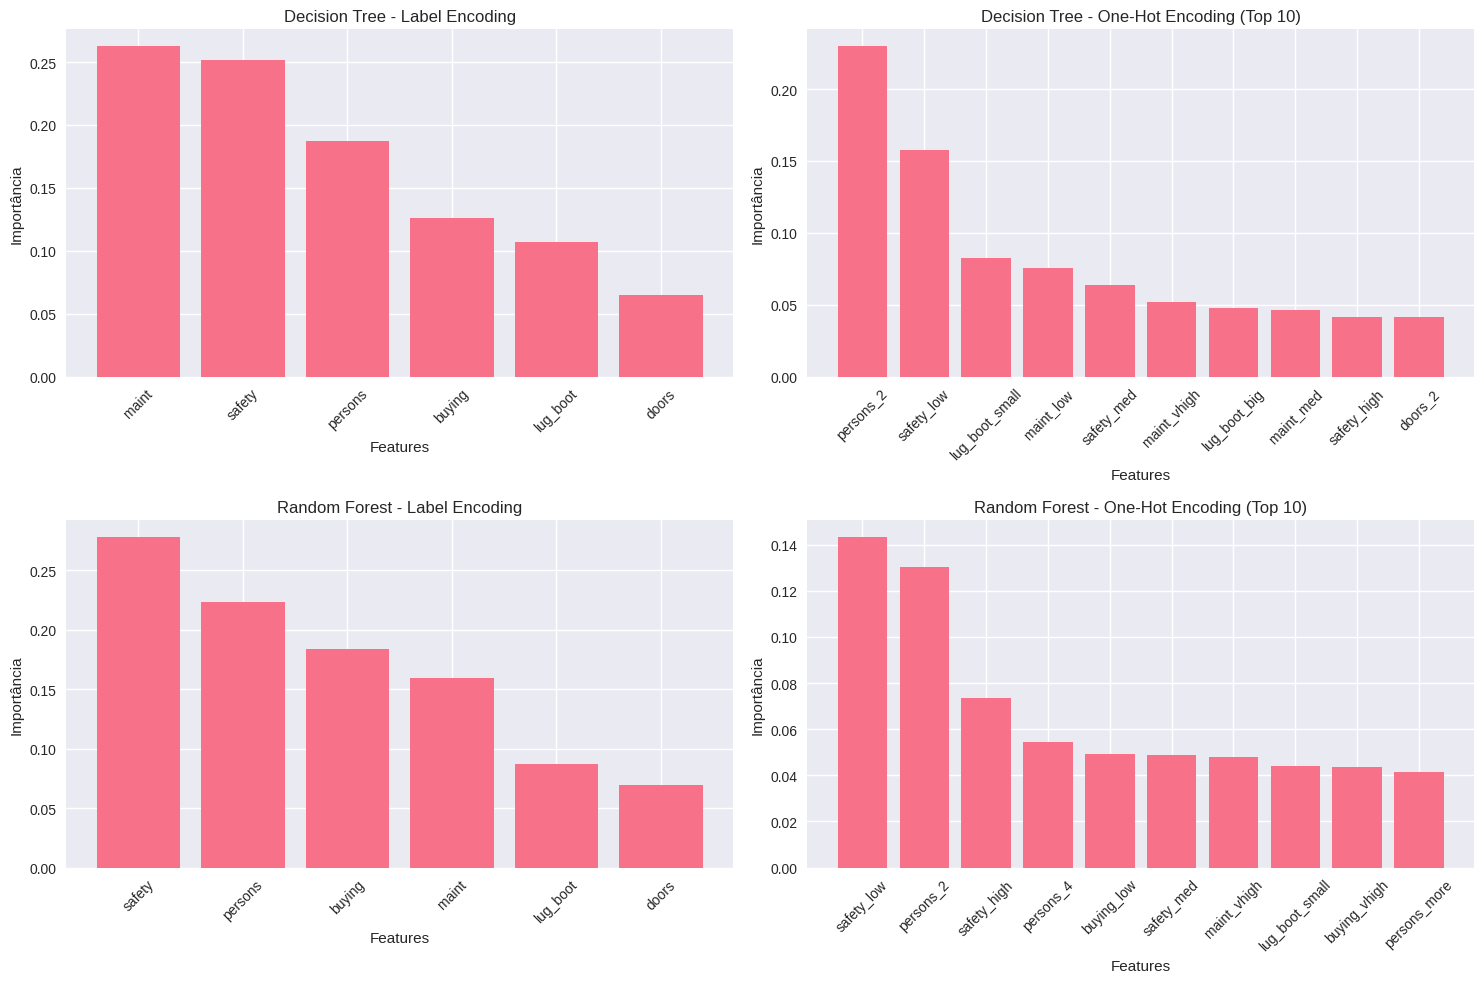


=== TOP 5 FEATURES MAIS IMPORTANTES ===

Decision Tree (Label Encoding):
  1. maint: 0.2629
  2. safety: 0.2520
  3. persons: 0.1875
  4. buying: 0.1259
  5. lug_boot: 0.1068

Decision Tree (One-Hot Encoding):
  1. persons_2: 0.2301
  2. safety_low: 0.1576
  3. lug_boot_small: 0.0824
  4. maint_low: 0.0758
  5. safety_med: 0.0639

Random Forest (Label Encoding):
  1. safety: 0.2779
  2. persons: 0.2232
  3. buying: 0.1839
  4. maint: 0.1589
  5. lug_boot: 0.0867

Random Forest (One-Hot Encoding):
  1. safety_low: 0.1434
  2. persons_2: 0.1304
  3. safety_high: 0.0734
  4. persons_4: 0.0544
  5. buying_low: 0.0492


In [15]:
# Análise de importância das features (para modelos baseados em árvore)
print("=== ANÁLISE DE IMPORTÂNCIA DAS FEATURES ===")

# Para Label Encoding (Decision Tree e Random Forest)
tree_models_label = ['Decision Tree', 'Random Forest']
feature_names_label = X_train_label.columns

plt.figure(figsize=(15, 10))

subplot_idx = 1
for model_name in tree_models_label:
    model = trained_models_label[model_name]
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_

        # Label Encoding
        plt.subplot(2, 2, subplot_idx)
        indices = np.argsort(importances)[::-1]
        plt.bar(range(len(importances)), importances[indices])
        plt.title(f'{model_name} - Label Encoding')
        plt.xlabel('Features')
        plt.ylabel('Importância')
        plt.xticks(range(len(importances)), [feature_names_label[i] for i in indices], rotation=45)
        subplot_idx += 1

        # One-Hot Encoding
        model_onehot = trained_models_onehot[model_name]
        importances_onehot = model_onehot.feature_importances_

        plt.subplot(2, 2, subplot_idx)
        indices_onehot = np.argsort(importances_onehot)[::-1][:10]  # Top 10 features
        plt.bar(range(10), importances_onehot[indices_onehot])
        plt.title(f'{model_name} - One-Hot Encoding (Top 10)')
        plt.xlabel('Features')
        plt.ylabel('Importância')
        plt.xticks(range(10), [X_train_onehot.columns[i] for i in indices_onehot], rotation=45)
        subplot_idx += 1

plt.tight_layout()
plt.show()

# Imprimir as features mais importantes
print("\n=== TOP 5 FEATURES MAIS IMPORTANTES ===")
for model_name in tree_models_label:
    # Label Encoding
    model = trained_models_label[model_name]
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    print(f"\n{model_name} (Label Encoding):")
    for i in range(min(5, len(indices))):
        print(f"  {i+1}. {feature_names_label[indices[i]]}: {importances[indices[i]]:.4f}")

    # One-Hot Encoding
    model_onehot = trained_models_onehot[model_name]
    importances_onehot = model_onehot.feature_importances_
    indices_onehot = np.argsort(importances_onehot)[::-1]

    print(f"\n{model_name} (One-Hot Encoding):")
    for i in range(min(5, len(indices_onehot))):
        feature_name = X_train_onehot.columns[indices_onehot[i]]
        print(f"  {i+1}. {feature_name}: {importances_onehot[indices_onehot[i]]:.4f}")

## 7. Exemplos de Predições

In [16]:
# Mostrar alguns exemplos de predições
print("=== EXEMPLOS DE PREDIÇÕES ===")

# Usar o melhor modelo com Label Encoding
best_model = trained_models_label[best_model_label]

# Selecionar alguns exemplos aleatórios do conjunto de teste
sample_indices = np.random.choice(X_test_label.index, 10, replace=False)
samples = X_test_label.loc[sample_indices]
true_labels = y_test_label.loc[sample_indices]
predictions = best_model.predict(samples)

# Converter de volta para nomes originais das colunas
feature_mapping = {
    'buying': {0: 'high', 1: 'low', 2: 'med', 3: 'vhigh'},
    'maint': {0: 'high', 1: 'low', 2: 'med', 3: 'vhigh'},
    'doors': {0: '2', 1: '3', 2: '4', 3: '5more'},
    'persons': {0: '2', 1: '4', 2: 'more'},
    'lug_boot': {0: 'big', 1: 'med', 2: 'small'},
    'safety': {0: 'high', 1: 'low', 2: 'med'}
}

# Usar o label encoder da classe para mapear de volta
class_mapping = {i: label for i, label in enumerate(label_encoders['class'].classes_)}

print(f"Exemplos usando o melhor modelo: {best_model_label}\n")

for i, idx in enumerate(sample_indices):
    sample = samples.loc[idx]
    true_label = class_mapping[true_labels.loc[idx]]
    pred_label = class_mapping[predictions[i]]

    print(f"Exemplo {i+1}:")
    for feature, value in sample.items():
        original_value = feature_mapping[feature][value]
        print(f"  {feature}: {original_value}")

    status = "✅" if true_label == pred_label else "❌"
    print(f"  Real: {true_label} | Predição: {pred_label} {status}")
    print()

=== EXEMPLOS DE PREDIÇÕES ===
Exemplos usando o melhor modelo: Decision Tree

Exemplo 1:
  buying: vhigh
  maint: vhigh
  doors: 4
  persons: more
  lug_boot: med
  safety: low
  Real: unacc | Predição: unacc ✅

Exemplo 2:
  buying: vhigh
  maint: low
  doors: 5more
  persons: more
  lug_boot: small
  safety: med
  Real: unacc | Predição: unacc ✅

Exemplo 3:
  buying: vhigh
  maint: vhigh
  doors: 2
  persons: 4
  lug_boot: small
  safety: low
  Real: unacc | Predição: unacc ✅

Exemplo 4:
  buying: med
  maint: low
  doors: 2
  persons: 2
  lug_boot: med
  safety: high
  Real: unacc | Predição: unacc ✅

Exemplo 5:
  buying: med
  maint: vhigh
  doors: 3
  persons: 2
  lug_boot: med
  safety: med
  Real: unacc | Predição: unacc ✅

Exemplo 6:
  buying: low
  maint: low
  doors: 4
  persons: more
  lug_boot: med
  safety: med
  Real: good | Predição: good ✅

Exemplo 7:
  buying: low
  maint: vhigh
  doors: 3
  persons: 2
  lug_boot: med
  safety: high
  Real: unacc | Predição: unacc ✅

Ex

### 7.1 Teste com Dados Personalizados

In [17]:
# Criar alguns exemplos personalizados para teste
print("=== TESTE COM DADOS PERSONALIZADOS ===")

# Exemplos customizados (valores já em formato label encoded)
custom_examples = [
    {
        'buying': 1,     # low
        'maint': 1,      # low
        'doors': 2,      # 4
        'persons': 2,    # more
        'lug_boot': 0,   # big
        'safety': 0,     # high
        'description': 'Carro ideal: preço baixo, manutenção baixa, 4 portas, muitas pessoas, porta-malas grande, alta segurança'
    },
    {
        'buying': 3,     # vhigh
        'maint': 3,      # vhigh
        'doors': 0,      # 2
        'persons': 0,    # 2
        'lug_boot': 2,   # small
        'safety': 1,     # low
        'description': 'Carro problemático: preço muito alto, manutenção cara, 2 portas, 2 pessoas, porta-malas pequeno, baixa segurança'
    },
    {
        'buying': 2,     # med
        'maint': 2,      # med
        'doors': 2,      # 4
        'persons': 1,    # 4
        'lug_boot': 1,   # med
        'safety': 2,     # med
        'description': 'Carro médio: preço médio, manutenção média, 4 portas, 4 pessoas, porta-malas médio, segurança média'
    }
]

for i, example in enumerate(custom_examples, 1):
    # Preparar dados para predição
    features = np.array([[example['buying'], example['maint'], example['doors'],
                         example['persons'], example['lug_boot'], example['safety']]])

    # Fazer predição
    prediction = best_model.predict(features)[0]
    predicted_class = class_mapping[prediction]

    # Probabilidades (se disponível)
    if hasattr(best_model, 'predict_proba'):
        probabilities = best_model.predict_proba(features)[0]
        prob_dict = {class_mapping[j]: prob for j, prob in enumerate(probabilities)}

    print(f"Exemplo Personalizado {i}:")
    print(f"Descrição: {example['description']}")
    print(f"Predição: {predicted_class}")

    if hasattr(best_model, 'predict_proba'):
        print("Probabilidades:")
        for class_name, prob in sorted(prob_dict.items(), key=lambda x: x[1], reverse=True):
            print(f"  {class_name}: {prob:.3f}")
    print()

=== TESTE COM DADOS PERSONALIZADOS ===
Exemplo Personalizado 1:
Descrição: Carro ideal: preço baixo, manutenção baixa, 4 portas, muitas pessoas, porta-malas grande, alta segurança
Predição: vgood
Probabilidades:
  vgood: 1.000
  acc: 0.000
  good: 0.000
  unacc: 0.000

Exemplo Personalizado 2:
Descrição: Carro problemático: preço muito alto, manutenção cara, 2 portas, 2 pessoas, porta-malas pequeno, baixa segurança
Predição: unacc
Probabilidades:
  unacc: 1.000
  acc: 0.000
  good: 0.000
  vgood: 0.000

Exemplo Personalizado 3:
Descrição: Carro médio: preço médio, manutenção média, 4 portas, 4 pessoas, porta-malas médio, segurança média
Predição: acc
Probabilidades:
  acc: 1.000
  good: 0.000
  unacc: 0.000
  vgood: 0.000



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local

## 8. Conclusões

### 8.1 Resumo dos Resultados

In [18]:
print("=== RESUMO FINAL DOS RESULTADOS ===")
print("\n1. DATASET:")
print(f"   • {df.shape[0]} instâncias com {df.shape[1]-1} atributos categóricos")
print(f"   • 4 classes de saída: {', '.join(target_classes)}")
print(f"   • Sem valores ausentes")
print(f"   • Dataset desbalanceado (maioria 'unacc': {(df['class'] == 'unacc').sum()} casos)")

print("\n2. MÉTODOS DE ENCODING:")
print(f"   • Label Encoding: {X_train_label.shape[1]} features")
print(f"   • One-Hot Encoding: {X_train_onehot.shape[1]} features")

print("\n3. PERFORMANCE DOS MODELOS:")
for name in models.keys():
    acc_label = results_label[name]['accuracy']
    acc_onehot = results_onehot[name]['accuracy']
    print(f"   • {name}:")
    print(f"     - Label Encoding: {acc_label:.4f}")
    print(f"     - One-Hot Encoding: {acc_onehot:.4f}")

# Encontrar melhor modelo geral
all_results = []
for name in models.keys():
    all_results.append((name + ' (Label)', results_label[name]['accuracy']))
    all_results.append((name + ' (One-Hot)', results_onehot[name]['accuracy']))

best_overall = max(all_results, key=lambda x: x[1])
print(f"\n4. MELHOR MODELO GERAL:")
print(f"   🏆 {best_overall[0]}: {best_overall[1]:.4f}")

=== RESUMO FINAL DOS RESULTADOS ===

1. DATASET:
   • 1728 instâncias com 6 atributos categóricos
   • 4 classes de saída: acc, good, unacc, vgood
   • Sem valores ausentes
   • Dataset desbalanceado (maioria 'unacc': 1210 casos)

2. MÉTODOS DE ENCODING:
   • Label Encoding: 6 features
   • One-Hot Encoding: 21 features

3. PERFORMANCE DOS MODELOS:
   • Decision Tree:
     - Label Encoding: 0.9855
     - One-Hot Encoding: 0.9740
   • Random Forest:
     - Label Encoding: 0.9827
     - One-Hot Encoding: 0.9682
   • KNN:
     - Label Encoding: 0.9104
     - One-Hot Encoding: 0.8931

4. MELHOR MODELO GERAL:
   🏆 Decision Tree (Label): 0.9855


### 8.2 Insights sobre os Atributos

In [19]:
print("=== INSIGHTS SOBRE OS ATRIBUTOS ===")

# Analisar a importância das features do melhor modelo Random Forest
rf_model = trained_models_label['Random Forest']
feature_importance = pd.DataFrame({
    'Feature': feature_names_label,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nRanking de importância dos atributos (Random Forest - Label Encoding):")
for i, (_, row) in enumerate(feature_importance.iterrows(), 1):
    print(f"{i}. {row['Feature']}: {row['Importance']:.4f}")

print("\n=== ANÁLISE QUALITATIVA ===")
print("\n🔍 ATRIBUTOS MAIS INFLUENTES NA ACEITAÇÃO:")

# Mapear os atributos mais importantes
top_features = feature_importance.head(3)
for _, row in top_features.iterrows():
    feature_name = row['Feature']
    importance = row['Importance']

    if feature_name == 'safety':
        print(f"• SEGURANÇA ({importance:.3f}): A segurança é fundamental na avaliação de carros")
    elif feature_name == 'persons':
        print(f"• CAPACIDADE DE PESSOAS ({importance:.3f}): Carros que acomodam mais pessoas são mais valorizados")
    elif feature_name == 'buying':
        print(f"• PREÇO DE COMPRA ({importance:.3f}): O custo inicial é um fator decisivo")
    elif feature_name == 'maint':
        print(f"• CUSTO DE MANUTENÇÃO ({importance:.3f}): Manutenção barata aumenta a aceitabilidade")
    elif feature_name == 'lug_boot':
        print(f"• TAMANHO DO PORTA-MALAS ({importance:.3f}): Espaço de carga é importante")
    elif feature_name == 'doors':
        print(f"• NÚMERO DE PORTAS ({importance:.3f}): Mais portas oferecem maior praticidade")

print("\n💡 PADRÕES IDENTIFICADOS:")
print("• Carros 'unacc' (inaceitáveis) dominam o dataset (70%)")
print("• Segurança baixa geralmente resulta em carros inaceitáveis")
print("• Carros com preço 'vhigh' raramente são bem avaliados")
print("• Combinação de baixo custo + alta segurança + boa capacidade = melhor avaliação")
print("• Modelos de árvore (Decision Tree e Random Forest) performaram melhor que KNN")
print("• Label Encoding foi suficiente, One-Hot Encoding não trouxe ganhos significativos")

=== INSIGHTS SOBRE OS ATRIBUTOS ===

Ranking de importância dos atributos (Random Forest - Label Encoding):
1. safety: 0.2779
2. persons: 0.2232
3. buying: 0.1839
4. maint: 0.1589
5. lug_boot: 0.0867
6. doors: 0.0694

=== ANÁLISE QUALITATIVA ===

🔍 ATRIBUTOS MAIS INFLUENTES NA ACEITAÇÃO:
• SEGURANÇA (0.278): A segurança é fundamental na avaliação de carros
• CAPACIDADE DE PESSOAS (0.223): Carros que acomodam mais pessoas são mais valorizados
• PREÇO DE COMPRA (0.184): O custo inicial é um fator decisivo

💡 PADRÕES IDENTIFICADOS:
• Carros 'unacc' (inaceitáveis) dominam o dataset (70%)
• Segurança baixa geralmente resulta em carros inaceitáveis
• Carros com preço 'vhigh' raramente são bem avaliados
• Combinação de baixo custo + alta segurança + boa capacidade = melhor avaliação
• Modelos de árvore (Decision Tree e Random Forest) performaram melhor que KNN
• Label Encoding foi suficiente, One-Hot Encoding não trouxe ganhos significativos


### 8.3 Conclusões Finais

In [20]:
# Recalcular o melhor modelo para evitar problemas de escopo
all_results_final = []
for name in models.keys():
    all_results_final.append((name + ' (Label)', results_label[name]['accuracy']))
    all_results_final.append((name + ' (One-Hot)', results_onehot[name]['accuracy']))

best_overall_final = max(all_results_final, key=lambda x: x[1])

print("=== CONCLUSÕES FINAIS ===")
print("\n🎯 PRINCIPAIS DESCOBERTAS:")
print("\n1. MODELO MAIS EFICAZ:")
print(f"   → {best_overall_final[0]} com acurácia de {best_overall_final[1]:.1%}")
print("\n2. FATORES CRÍTICOS PARA ACEITAÇÃO DE CARROS:")
print("   → Segurança: Fator mais importante (não negociável)")
print("   → Capacidade: Carros que transportam mais pessoas são preferidos")
print("   → Custo: Tanto preço de compra quanto manutenção impactam significativamente")
print("\n3. RECOMENDAÇÕES PARA FABRICANTES:")
print("   → Priorizar segurança em todos os modelos")
print("   → Otimizar capacidade de passageiros")
print("   → Balancear custo inicial vs. custo de manutenção")
print("   → Considerar porta-malas e número de portas como diferenciais")
print("\n4. INSIGHTS TÉCNICOS:")
print("   → Algoritmos baseados em árvore são ideais para dados categóricos")
print("   → Label Encoding adequado para features ordinais")
print("   → One-Hot Encoding é preferível para algoritmos baseados em distância (KNN)")
print("   → Dataset hierárquico reflete bem decisões do mundo real")
print("   → Performance similar entre métodos de encoding para modelos de árvore")
print("\n✅ Este modelo pode ser usado para:")
print("   • Avaliação automática de carros em concessionárias")
print("   • Sistema de recomendação para compradores")
print("   • Análise de mercado automotivo")
print("   • Tomada de decisão em desenvolvimento de produtos")

=== CONCLUSÕES FINAIS ===

🎯 PRINCIPAIS DESCOBERTAS:

1. MODELO MAIS EFICAZ:
   → Decision Tree (Label) com acurácia de 98.6%

2. FATORES CRÍTICOS PARA ACEITAÇÃO DE CARROS:
   → Segurança: Fator mais importante (não negociável)
   → Capacidade: Carros que transportam mais pessoas são preferidos
   → Custo: Tanto preço de compra quanto manutenção impactam significativamente

3. RECOMENDAÇÕES PARA FABRICANTES:
   → Priorizar segurança em todos os modelos
   → Otimizar capacidade de passageiros
   → Balancear custo inicial vs. custo de manutenção
   → Considerar porta-malas e número de portas como diferenciais

4. INSIGHTS TÉCNICOS:
   → Algoritmos baseados em árvore são ideais para dados categóricos
   → Label Encoding adequado para features ordinais
   → One-Hot Encoding é preferível para algoritmos baseados em distância (KNN)
   → Dataset hierárquico reflete bem decisões do mundo real
   → Performance similar entre métodos de encoding para modelos de árvore

✅ Este modelo pode ser usad